<a href="https://colab.research.google.com/github/somelijer/Fork-instance-segmentation/blob/main/InstanceSegmentationORI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Making subset of coco dataset


In [1]:
!pip install CocoDataset==0.1.2

In [2]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip /content/annotations_trainval2017.zip

--2023-06-29 15:01:20--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 54.231.193.129, 52.217.114.25, 52.216.37.185, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|54.231.193.129|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  13.4MB/s    in 20s     

2023-06-29 15:01:40 (12.1 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  /content/annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
from coco_dataset import coco_dataset_download as cocod
class_name='fork'
images_count=3000
annotations_path='/content/annotations/instances_train2017.json'
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=46.33s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
no.of image: 51
no.of image: 52
no.of image: 53
no.of image: 54
no.of image: 55
no.of image: 56
no.of image: 57
no.of image: 

Making subfolders

In [ ]:
import os
import random
import shutil

def distribute_images_randomly(image_folder, output_folder, num_folders):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the input folder
    image_files = os.listdir(image_folder)

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate the number of images per folder
    images_per_folder = len(image_files) // num_folders

    # Distribute the images into separate folders
    for i in range(num_folders):
        folder_path = os.path.join(output_folder, f'folder_{i+1}')
        os.makedirs(folder_path, exist_ok=True)

        # Select the images for the current folder
        start_index = i * images_per_folder
        end_index = (i + 1) * images_per_folder
        if i == num_folders - 1:
            end_index = len(image_files)  # For the last folder, include remaining images

        selected_images = image_files[start_index:end_index]

        # Copy the selected images to the current folder
        for image_file in selected_images:
            src_path = os.path.join(image_folder, image_file)
            dst_path = os.path.join(folder_path, image_file)
            shutil.copy(src_path, dst_path)

    print(f"Images distributed into {num_folders} folders at: {output_folder}")

# Set the necessary variables for creating the filtered annotation file
image_folder = '/content/fork'  # Replace with the path to the folder containing your fork images from the COCO dataset
picture_output_folder = '/content/forkPictures'

distribute_images_randomly(image_folder, picture_output_folder, 30)

Images distributed into 30 folders at: /content/forkPictures


Making the annotations

In [ ]:
import json
import os
import shutil

def create_fork_annotation_file(image_folder, annotation_file, picture_output_folder,anno_output_folder, class_name, image_count):
    # Create the output folder if it doesn't exist
    os.makedirs(picture_output_folder, exist_ok=True)
    os.makedirs(anno_output_folder, exist_ok=True)

    # Load the COCO annotation file
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Filter images that contain only the specified class
    filtered_images = [image for image in coco_data['images'] if image['file_name'] in os.listdir(image_folder)]
    filtered_image_ids = [image['id'] for image in filtered_images]

    #print(filtered_image_ids)

    # Filter annotations for the selected images

    filtered_annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] in filtered_image_ids and annotation['category_id'] == 48]
    for annotation in filtered_annotations:
        annotation['category_id'] = 1
    print("Filtrirana anotacija: ",filtered_annotations[0])

    # Update the image and annotation lists in the filtered COCO data
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    # Remove all other categories
    coco_data['categories'] = [{"id": 1, "name": class_name}]

    # Save the filtered annotation file
    output_annotation_file = os.path.join(anno_output_folder, 'instances_fork.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(coco_data, f)

    # Copy the selected fork images to the output folder
    for image in filtered_images:
        image_path = os.path.join(image_folder, image['file_name'])
        shutil.copy(image_path, picture_output_folder)

    print(f"Filtered annotation file saved at: {anno_output_folder}")
    print(f"Selected fork images copied to: {picture_output_folder}")


parent_folder = '/content/forkPictures'  # Replace with the path to the parent folder containing the subfolders

# Iterate over all subfolders
i = 1
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)

    # Set the necessary variables for creating the filtered annotation file
    image_folder = folder_path
    annotation_file = '/content/annotations/instances_train2017.json'  # Replace with the path to the original COCO annotation file
    output_folder = '/content/trainSubsets/'+ str(i)  # Replace with the desired output folder path
    picture_output_folder = os.path.join(output_folder, 'subsetPictures')
    anno_output_folder = os.path.join(output_folder, 'subsetAnnotations')
    i+=1

    # Create the filtered annotation file and copy the selected images to the output folder
    create_fork_annotation_file(image_folder, annotation_file, picture_output_folder, anno_output_folder, class_name, images_count)



Filtrirana anotacija:  {'segmentation': [[372.19, 199.18, 374.83, 208.16, 391.21, 228.78, 391.74, 252.03, 391.74, 263.66, 410.24, 363.02, 418.7, 372.0, 428.74, 370.95, 436.14, 364.08, 436.67, 356.15, 418.7, 264.72, 415.13, 250.05, 408.86, 235.28, 406.18, 225.43, 410.2, 208.43, 412.44, 190.08, 403.49, 165.66, 395.35, 143.27, 403.49, 188.04, 400.1, 188.72, 389.24, 155.48, 383.82, 141.92, 393.31, 192.11, 391.28, 191.43, 387.89, 179.22, 376.35, 145.99, 382.46, 192.79, 379.75, 193.47, 370.93, 154.13, 366.86, 155.48]], 'area': 5642.129900000001, 'iscrowd': 0, 'image_id': 190585, 'bbox': [366.86, 141.92, 69.81, 230.08], 'category_id': 1, 'id': 686158}
Filtered annotation file saved at: /content/trainSubsets/1/subsetAnnotations
Selected fork images copied to: /content/trainSubsets/1/subsetPictures
Filtrirana anotacija:  {'segmentation': [[16.26, 403.67, 16.26, 398.01, 20.44, 393.43, 20.58, 376.57, 24.49, 376.44, 23.95, 390.73, 23.54, 394.78, 27.99, 399.36, 26.65, 403.94, 25.03, 400.3, 23.68, 4

Test the data

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab

def load_random_photo_with_annotations(annotation_file, image_folder):
    # Load the COCO annotation file
    coco = COCO(annotation_file)

    # display COCO categories and supercategories
    cats = coco.loadCats(coco.getCatIds())
    nms=[cat['name'] for cat in cats]
    print('\nCOCO categories: \n{}\n'.format(' '.join(nms)))

    # get all images containing given categories, select one at random
    catIds = coco.getCatIds(catNms=['fork']);
    imgIds = coco.getImgIds(catIds=catIds );
    img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

    print("\nNumber of photos in dataset: ",len(imgIds),"\n")
    print(imgIds)

    # load and display image
    # I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
    # use url to load image
    I = io.imread(img['coco_url'])\

    # load and display instance annotations
    plt.imshow(I); plt.axis('off')
    annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)



# Set the necessary variables
annotation_file = '/content/subsetAnnotations/instances_fork.json'  # Replace with the path to the filtered annotation file
image_folder = '/content/subsetPictures'  # Replace with the path to the folder containing the subset images

# Load a random photo with its annotations and segmentation masks
load_random_photo_with_annotations(annotation_file, image_folder)


loading annotations into memory...


FileNotFoundError: ignored

# Create the model

In [9]:
import torch
import torchvision

model = torchvision.models.detection.maskrcnn_resnet50_fpn(pretrained=True)

# Replace the classifier head for the desired number of classes
num_classes = 2  # Including background and forks
in_features = model.roi_heads.box_predictor.cls_score.in_features
model.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

# Replace the mask predictor for the desired number of classes
in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels
hidden_layer = 256
model.roi_heads.mask_predictor = torchvision.models.detection.mask_rcnn.MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)

# Print the modified model architecture
#print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [10]:
model.eval()

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

# Load model

In [12]:
import torch


model_path = '/content/model_2023-06-27_13-32-54.pth'

# Load the model state dictionary
state_dict = torch.load(model_path)

# Load the state dictionary into the model
model.load_state_dict(state_dict)

<All keys matched successfully>

# Import helper functions

In [126]:
def convert_to_coco_api(ds):
    coco_ds = COCO()
    # annotation IDs need to start at 1, not 0, see torchvision issue #1530
    ann_id = 1
    dataset = {"images": [], "categories": [], "annotations": []}
    categories = set()
    for img_idx in range(len(ds)):
        # find better way to get target
        # targets = ds.get_annotations(img_idx)
        img, targets = ds[img_idx]
        image_id = targets["image_id"].item()
        img_dict = {}
        img_dict["id"] = image_id
        img_dict["height"] = img.shape[-2]
        img_dict["width"] = img.shape[-1]
        dataset["images"].append(img_dict)
        bboxes = targets["boxes"].clone()
        bboxes[:, 2:] -= bboxes[:, :2]
        bboxes = bboxes.tolist()
        labels = targets["labels"].tolist()
        areas = targets["area"].tolist()
        iscrowd = targets["iscrowd"].tolist()
        if "masks" in targets:
            masks = targets["masks"]
            # make masks Fortran contiguous for coco_mask
            masks = masks.permute(0, 2, 1).contiguous().permute(0, 2, 1)
        if "keypoints" in targets:
            keypoints = targets["keypoints"]
            keypoints = keypoints.reshape(keypoints.shape[0], -1).tolist()
        num_objs = len(bboxes)
        for i in range(num_objs):
            ann = {}
            ann["image_id"] = image_id
            ann["bbox"] = bboxes[i]
            ann["category_id"] = labels[i]
            categories.add(labels[i])
            ann["area"] = areas[i]
            ann["iscrowd"] = iscrowd[i]
            ann["id"] = ann_id
            if "masks" in targets:
                ann["segmentation"] = coco_mask.encode(masks[i].numpy())
            if "keypoints" in targets:
                ann["keypoints"] = keypoints[i]
                ann["num_keypoints"] = sum(k != 0 for k in keypoints[i][2::3])
            dataset["annotations"].append(ann)
            ann_id += 1
    dataset["categories"] = [{"id": i} for i in sorted(categories)]
    coco_ds.dataset = dataset
    coco_ds.createIndex()
    return coco_ds


In [114]:
def all_gather(data):
    """
    Run all_gather on arbitrary picklable data (not necessarily tensors)
    Args:
        data: any picklable object
    Returns:
        list[data]: list of data gathered from each rank
    """
    world_size = get_world_size()
    if world_size == 1:
        return [data]
    data_list = [None] * world_size
    dist.all_gather_object(data_list, data)
    return data_list

In [129]:
import copy
import io
from contextlib import redirect_stdout

import numpy as np
import pycocotools.mask as mask_util
import torch
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


class CocoEvaluator:
    def __init__(self, coco_gt, iou_types):
        if not isinstance(iou_types, (list, tuple)):
            raise TypeError(f"This constructor expects iou_types of type list or tuple, instead got {type(iou_types)}")
        coco_gt = copy.deepcopy(coco_gt)
        self.coco_gt = coco_gt

        self.iou_types = iou_types
        self.coco_eval = {}
        for iou_type in iou_types:
            self.coco_eval[iou_type] = COCOeval(coco_gt, iouType=iou_type)

        self.img_ids = []
        self.eval_imgs = {k: [] for k in iou_types}

    def update(self, predictions):
        img_ids = list(np.unique(list(predictions.keys())))
        self.img_ids.extend(img_ids)

        for iou_type in self.iou_types:
            results = self.prepare(predictions, iou_type)
            with redirect_stdout(io.StringIO()):
                coco_dt = COCO.loadRes(self.coco_gt, results) if results else COCO()
            coco_eval = self.coco_eval[iou_type]

            coco_eval.cocoDt = coco_dt
            coco_eval.params.imgIds = list(img_ids)
            self.eval_imgs[iou_type].append(coco_eval.evaluate())

    def synchronize_between_processes(self):
        for iou_type in self.iou_types:
            self.eval_imgs[iou_type] = np.concatenate(self.eval_imgs[iou_type], 2)
            create_common_coco_eval(self.coco_eval[iou_type], self.img_ids, self.eval_imgs[iou_type])

    def accumulate(self):
        for coco_eval in self.coco_eval.values():
            coco_eval.accumulate()

    def summarize(self):
        for iou_type, coco_eval in self.coco_eval.items():
            print(f"IoU metric: {iou_type}")
            coco_eval.summarize()

    def prepare(self, predictions, iou_type):
        if iou_type == "bbox":
            return self.prepare_for_coco_detection(predictions)
        if iou_type == "segm":
            return self.prepare_for_coco_segmentation(predictions)
        if iou_type == "keypoints":
            return self.prepare_for_coco_keypoint(predictions)
        raise ValueError(f"Unknown iou type {iou_type}")

    def prepare_for_coco_detection(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "bbox": box,
                        "score": scores[k],
                    }
                    for k, box in enumerate(boxes)
                ]
            )
        return coco_results

    def prepare_for_coco_segmentation(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            scores = prediction["scores"]
            labels = prediction["labels"]
            masks = prediction["masks"]

            masks = masks > 0.5

            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()

            rles = [
                mask_util.encode(np.array(mask[0, :, :, np.newaxis], dtype=np.uint8, order="F"))[0] for mask in masks
            ]
            for rle in rles:
                rle["counts"] = rle["counts"].decode("utf-8")

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "segmentation": rle,
                        "score": scores[k],
                    }
                    for k, rle in enumerate(rles)
                ]
            )
        return coco_results

    def prepare_for_coco_keypoint(self, predictions):
        coco_results = []
        for original_id, prediction in predictions.items():
            if len(prediction) == 0:
                continue

            boxes = prediction["boxes"]
            boxes = convert_to_xywh(boxes).tolist()
            scores = prediction["scores"].tolist()
            labels = prediction["labels"].tolist()
            keypoints = prediction["keypoints"]
            keypoints = keypoints.flatten(start_dim=1).tolist()

            coco_results.extend(
                [
                    {
                        "image_id": original_id,
                        "category_id": labels[k],
                        "keypoints": keypoint,
                        "score": scores[k],
                    }
                    for k, keypoint in enumerate(keypoints)
                ]
            )
        return coco_results


def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)


def merge(img_ids, eval_imgs):
    all_img_ids = all_gather(img_ids)
    all_eval_imgs = all_gather(eval_imgs)

    merged_img_ids = []
    for p in all_img_ids:
        merged_img_ids.extend(p)

    merged_eval_imgs = []
    for p in all_eval_imgs:
        merged_eval_imgs.append(p)

    merged_img_ids = np.array(merged_img_ids)
    merged_eval_imgs = np.concatenate(merged_eval_imgs, 2)

    # keep only unique (and in sorted order) images
    merged_img_ids, idx = np.unique(merged_img_ids, return_index=True)
    merged_eval_imgs = merged_eval_imgs[..., idx]

    return merged_img_ids, merged_eval_imgs


def create_common_coco_eval(coco_eval, img_ids, eval_imgs):
    img_ids, eval_imgs = merge(img_ids, eval_imgs)
    img_ids = list(img_ids)
    eval_imgs = list(eval_imgs.flatten())

    coco_eval.evalImgs = eval_imgs
    coco_eval.params.imgIds = img_ids
    coco_eval._paramsEval = copy.deepcopy(coco_eval.params)


In [140]:
import math
import sys
import time

import torch
import torchvision.models.detection.mask_rcnn


def train_one_epoch(model, optimizer, data_loader, device, epoch, print_freq, scaler=None):
    model.train()
    metric_logger = MetricLogger(delimiter="  ")
    metric_logger.add_meter("lr", SmoothedValue(window_size=1, fmt="{value:.6f}"))
    header = f"Epoch: [{epoch}]"

    lr_scheduler = None
    if epoch == 0:
        warmup_factor = 1.0 / 1000
        warmup_iters = min(1000, len(data_loader) - 1)

        lr_scheduler = torch.optim.lr_scheduler.LinearLR(
            optimizer, start_factor=warmup_factor, total_iters=warmup_iters
        )

    for images, targets in metric_logger.log_every(data_loader, print_freq, header):
        images = list(image.to(device) for image in images)
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]
        with torch.cuda.amp.autocast(enabled=scaler is not None):
            loss_dict = model(images, targets)
            losses = sum(loss for loss in loss_dict.values())

        # reduce losses over all GPUs for logging purposes
        loss_dict_reduced = utils.reduce_dict(loss_dict)
        losses_reduced = sum(loss for loss in loss_dict_reduced.values())

        loss_value = losses_reduced.item()

        if not math.isfinite(loss_value):
            print(f"Loss is {loss_value}, stopping training")
            print(loss_dict_reduced)
            sys.exit(1)

        optimizer.zero_grad()
        if scaler is not None:
            scaler.scale(losses).backward()
            scaler.step(optimizer)
            scaler.update()
        else:
            losses.backward()
            optimizer.step()

        if lr_scheduler is not None:
            lr_scheduler.step()

        metric_logger.update(loss=losses_reduced, **loss_dict_reduced)
        metric_logger.update(lr=optimizer.param_groups[0]["lr"])

    return metric_logger


def _get_iou_types(model):
    model_without_ddp = model
    if isinstance(model, torch.nn.parallel.DistributedDataParallel):
        model_without_ddp = model.module
    iou_types = ["bbox"]
    if isinstance(model_without_ddp, torchvision.models.detection.MaskRCNN):
        iou_types.append("segm")
    if isinstance(model_without_ddp, torchvision.models.detection.KeypointRCNN):
        iou_types.append("keypoints")
    return iou_types


@torch.inference_mode()
def evaluate(model, data_loader, device):
    n_threads = torch.get_num_threads()
    # FIXME remove this and make paste_masks_in_image run on the GPU
    torch.set_num_threads(1)
    cpu_device = torch.device("cpu")
    model.eval()
    metric_logger = MetricLogger(delimiter="  ")
    header = "Test:"

    coco = get_coco_api_from_dataset(data_loader.dataset)
    iou_types = _get_iou_types(model)
    coco_evaluator = CocoEvaluator(coco, iou_types)

    for images, targets in metric_logger.log_every(data_loader, 100, header):
        images = list(img.to(device) for img in images)

        if torch.cuda.is_available():
            torch.cuda.synchronize()
        model_time = time.time()
        outputs = model(images)

        outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
        model_time = time.time() - model_time

        res = {target["image_id"].item(): output for target, output in zip(targets, outputs)}
        evaluator_time = time.time()
        coco_evaluator.update(res)
        evaluator_time = time.time() - evaluator_time
        metric_logger.update(model_time=model_time, evaluator_time=evaluator_time)

    # gather the stats from all processes
    metric_logger.synchronize_between_processes()
    print("Averaged stats:", metric_logger)
    try:
      coco_evaluator.synchronize_between_processes()
    except:
      print("Lol")

    # accumulate predictions from all images
    coco_evaluator.accumulate()
    coco_evaluator.summarize()
    torch.set_num_threads(n_threads)
    return coco_evaluator

In [117]:
class SmoothedValue:
    """Track a series of values and provide access to smoothed values over a
    window or the global series average.
    """

    def __init__(self, window_size=20, fmt=None):
        if fmt is None:
            fmt = "{median:.4f} ({global_avg:.4f})"
        self.deque = deque(maxlen=window_size)
        self.total = 0.0
        self.count = 0
        self.fmt = fmt

    def update(self, value, n=1):
        self.deque.append(value)
        self.count += n
        self.total += value * n

    def synchronize_between_processes(self):
        """
        Warning: does not synchronize the deque!
        """
        t = reduce_across_processes([self.count, self.total])
        t = t.tolist()
        self.count = int(t[0])
        self.total = t[1]

    @property
    def median(self):
        d = torch.tensor(list(self.deque))
        return d.median().item()

    @property
    def avg(self):
        d = torch.tensor(list(self.deque), dtype=torch.float32)
        return d.mean().item()

    @property
    def global_avg(self):
        return self.total / self.count

    @property
    def max(self):
        return max(self.deque)

    @property
    def value(self):
        return self.deque[-1]

    def __str__(self):
        return self.fmt.format(
            median=self.median, avg=self.avg, global_avg=self.global_avg, max=self.max, value=self.value
        )

In [118]:
def collate_fn(batch):
    return tuple(zip(*batch))


In [133]:
def reduce_across_processes(val):
    return torch.tensor(val)

In [120]:
class ConfusionMatrix:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.mat = None

    def update(self, a, b):
        n = self.num_classes
        if self.mat is None:
            self.mat = torch.zeros((n, n), dtype=torch.int64, device=a.device)
        with torch.inference_mode():
            k = (a >= 0) & (a < n)
            inds = n * a[k].to(torch.int64) + b[k]
            self.mat += torch.bincount(inds, minlength=n**2).reshape(n, n)

    def reset(self):
        self.mat.zero_()

    def compute(self):
        h = self.mat.float()
        acc_global = torch.diag(h).sum() / h.sum()
        acc = torch.diag(h) / h.sum(1)
        iu = torch.diag(h) / (h.sum(1) + h.sum(0) - torch.diag(h))
        return acc_global, acc, iu

    def __str__(self):
        acc_global, acc, iu = self.compute()
        return ("global correct: {:.1f}\naverage row correct: {}\nIoU: {}\nmean IoU: {:.1f}").format(
            acc_global.item() * 100,
            [f"{i:.1f}" for i in (acc * 100).tolist()],
            [f"{i:.1f}" for i in (iu * 100).tolist()],
            iu.mean().item() * 100,
        )



In [131]:
import datetime

class MetricLogger:
    def __init__(self, delimiter="\t"):
        self.meters = defaultdict(SmoothedValue)
        self.delimiter = delimiter

    def update(self, **kwargs):
        for k, v in kwargs.items():
            if isinstance(v, torch.Tensor):
                v = v.item()
            if not isinstance(v, (float, int)):
                raise TypeError(
                    f"This method expects the value of the input arguments to be of type float or int, instead  got {type(v)}"
                )
            self.meters[k].update(v)

    def __getattr__(self, attr):
        if attr in self.meters:
            return self.meters[attr]
        if attr in self.__dict__:
            return self.__dict__[attr]
        raise AttributeError(f"'{type(self).__name__}' object has no attribute '{attr}'")

    def __str__(self):
        loss_str = []
        for name, meter in self.meters.items():
            loss_str.append(f"{name}: {str(meter)}")
        return self.delimiter.join(loss_str)

    def synchronize_between_processes(self):
        for meter in self.meters.values():
            meter.synchronize_between_processes()

    def add_meter(self, name, meter):
        self.meters[name] = meter

    def log_every(self, iterable, print_freq, header=None):
        i = 0
        if not header:
            header = ""
        start_time = time.time()
        end = time.time()
        iter_time = SmoothedValue(fmt="{avg:.4f}")
        data_time = SmoothedValue(fmt="{avg:.4f}")
        space_fmt = ":" + str(len(str(len(iterable)))) + "d"
        if torch.cuda.is_available():
            log_msg = self.delimiter.join(
                [
                    header,
                    "[{0" + space_fmt + "}/{1}]",
                    "eta: {eta}",
                    "{meters}",
                    "time: {time}",
                    "data: {data}",
                    "max mem: {memory:.0f}",
                ]
            )
        else:
            log_msg = self.delimiter.join(
                [header, "[{0" + space_fmt + "}/{1}]", "eta: {eta}", "{meters}", "time: {time}", "data: {data}"]
            )
        MB = 1024.0 * 1024.0
        for obj in iterable:
            data_time.update(time.time() - end)
            yield obj
            iter_time.update(time.time() - end)
            if i % print_freq == 0:
                eta_seconds = iter_time.global_avg * (len(iterable) - i)
                eta_string = str(datetime.timedelta(seconds=int(eta_seconds)))
                if torch.cuda.is_available():
                    print(
                        log_msg.format(
                            i,
                            len(iterable),
                            eta=eta_string,
                            meters=str(self),
                            time=str(iter_time),
                            data=str(data_time),
                            memory=torch.cuda.max_memory_allocated() / MB,
                        )
                    )
                else:
                    print(
                        log_msg.format(
                            i, len(iterable), eta=eta_string, meters=str(self), time=str(iter_time), data=str(data_time)
                        )
                    )
            i += 1
            end = time.time()
        total_time = time.time() - start_time
        total_time_str = str(datetime.timedelta(seconds=int(total_time)))
        print(f"{header} Total time: {total_time_str}")

In [122]:
import copy
import os

import torch
import torch.utils.data
import torchvision

from pycocotools import mask as coco_mask
from pycocotools.coco import COCO

import numpy as np


class FilterAndRemapCocoCategories(object):
    def __init__(self, categories, remap=True):
        self.categories = categories
        self.remap = remap

    def __call__(self, image, target):
        anno = target["annotations"]
        anno = [obj for obj in anno if obj["category_id"] in self.categories]
        if not self.remap:
            target["annotations"] = anno
            return image, target
        anno = copy.deepcopy(anno)
        for obj in anno:
            obj["category_id"] = self.categories.index(obj["category_id"])
        target["annotations"] = anno
        return image, target


def convert_coco_poly_to_torch_mask(
    segmentations, height: int, width: int
) -> torch.tensor:
    """
    Converts polygons in COCO format to masks with size height*width. Result
    is returned as a torch tensor.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks as a torch tensor.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = torch.as_tensor(mask, dtype=torch.uint8)
        mask = mask.any(dim=2)
        masks.append(mask)
    if masks:
        masks = torch.stack(masks, dim=0)
    else:
        masks = torch.zeros((0, height, width), dtype=torch.uint8)
    return masks


def convert_coco_poly_to_mask(segmentations, height: int, width: int) -> list:
    """
    Converts polygons in COCO format to masks with size height*width.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        masks: List of masks with elemnts of type np.uint8.
    """
    masks = []
    for polygons in segmentations:
        rles = coco_mask.frPyObjects(polygons, height, width)
        mask = coco_mask.decode(rles)
        if len(mask.shape) < 3:
            mask = mask[..., None]
        mask = mask.any(axis=2).astype(np.uint8)
        masks.append(mask)
    if not (masks):
        masks = np.zeros((0, height, width))
    return masks


class ConvertCocoPolysToMask(object):
    def __call__(self, image, target):
        w, h = image.size

        image_id = target["image_id"]
        image_id = torch.tensor([image_id])

        anno = target["annotations"]

        anno = [obj for obj in anno if obj["iscrowd"] == 0]

        boxes = [obj["bbox"] for obj in anno]
        # guard against no boxes via resizing
        boxes = torch.as_tensor(boxes, dtype=torch.float32).reshape(-1, 4)
        boxes[:, 2:] += boxes[:, :2]
        boxes[:, 0::2].clamp_(min=0, max=w)
        boxes[:, 1::2].clamp_(min=0, max=h)

        classes = [obj["category_id"] for obj in anno]
        classes = torch.tensor(classes, dtype=torch.int64)

        segmentations = [obj["segmentation"] for obj in anno]
        masks = convert_coco_poly_to_mask(segmentations, h, w)

        keypoints = None
        if anno and "keypoints" in anno[0]:
            keypoints = [obj["keypoints"] for obj in anno]
            keypoints = torch.as_tensor(keypoints, dtype=torch.float32)
            num_keypoints = keypoints.shape[0]
            if num_keypoints:
                keypoints = keypoints.view(num_keypoints, -1, 3)

        keep = (boxes[:, 3] > boxes[:, 1]) & (boxes[:, 2] > boxes[:, 0])
        boxes = boxes[keep]
        classes = classes[keep]
        masks = masks[keep]
        if keypoints is not None:
            keypoints = keypoints[keep]

        target = {}
        target["boxes"] = boxes
        target["labels"] = classes
        target["masks"] = masks
        target["image_id"] = image_id
        if keypoints is not None:
            target["keypoints"] = keypoints

        # for conversion to coco api
        area = torch.tensor([obj["area"] for obj in anno])
        iscrowd = torch.tensor([obj["iscrowd"] for obj in anno])
        target["area"] = area
        target["iscrowd"] = iscrowd

        return image, target


    def _has_valid_annotation(anno):
        # if it's empty, there is no annotation
        if len(anno) == 0:
            return False
        # if all boxes have close to zero area, there is no annotation
        if _has_only_empty_bbox(anno):
            return False
        # keypoints task have a slight different critera for considering
        # if an annotation is valid
        if "keypoints" not in anno[0]:
            return True
        # for keypoint detection tasks, only consider valid images those
        # containing at least min_keypoints_per_image
        if _count_visible_keypoints(anno) >= min_keypoints_per_image:
            return True
        return False

        assert isinstance(dataset, torchvision.datasets.CocoDetection)
        ids = []
        for ds_idx, img_id in enumerate(dataset.ids):
            ann_ids = dataset.coco.getAnnIds(imgIds=img_id, iscrowd=None)
            anno = dataset.coco.loadAnns(ann_ids)
            if cat_list:
                anno = [obj for obj in anno if obj["category_id"] in cat_list]
            if _has_valid_annotation(anno):
                ids.append(ds_idx)

        dataset = torch.utils.data.Subset(dataset, ids)
        return dataset


def get_coco_api_from_dataset(dataset):
    for _ in range(10):
        if isinstance(dataset, torchvision.datasets.CocoDetection):
            break
        if isinstance(dataset, torch.utils.data.Subset):
            dataset = dataset.dataset
    if isinstance(dataset, torchvision.datasets.CocoDetection):
        return dataset.coco
    return convert_to_coco_api(dataset)


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(self, img_folder, ann_file):
        super(CocoDetection, self).__init__(img_folder, ann_file)

    def __getitem__(self, idx):
        img, target = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        target = dict(image_id=image_id, annotations=target)
        return img, target


def get_coco(root, image_set, transforms, mode="instances"):
    anno_file_template = "{}_{}2017.json"
    PATHS = {
        "train": (
            "train2017",
            os.path.join("annotations", anno_file_template.format(mode, "train")),
        ),
        "val": (
            "val2017",
            os.path.join("annotations", anno_file_template.format(mode, "val")),
        ),
        # "train": ("val2017", os.path.join("annotations", anno_file_template.format(mode, "val")))
    }

    t = [ConvertCocoPolysToMask()]

    if transforms is not None:
        t.append(transforms)
    transforms = T.Compose(t)

    img_folder, ann_file = PATHS[image_set]
    img_folder = os.path.join(root, img_folder)
    ann_file = os.path.join(root, ann_file)

    dataset = CocoDetection(img_folder, ann_file, transforms=transforms)

    if image_set == "train":
        dataset = _coco_remove_images_without_annotations(dataset)

    # dataset = torch.utils.data.Subset(dataset, [i for i in range(500)])

    return dataset


def get_coco_kp(root, image_set, transforms):
    return get_coco(root, image_set, transforms, mode="person_keypoints")


def coco_seg2bbox(polygons, image_height: int, image_width: int) -> list:
    """Converts polygons in COCO format to bounding box in pixels.
    Args:
        polygons:
        image_height: Height of the target image.
        image_width: Width of the target image.
    Returns: [x_min, y_min, width, height]
    """
    rles = coco_mask.frPyObjects(polygons, image_height, image_width)
    mask = coco_mask.decode(rles)
    bbox = coco_mask.toBbox(coco_mask.encode(np.asfortranarray(mask.astype(np.uint8))))

    return bbox[0].astype(int).tolist()


def convert_coco_poly_to_torch_bbox(
    segmentations: list, height: int, width: int
) -> (torch.tensor, torch.tensor):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format. Results are returned as
    torch tensors.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes as torch tensor [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes as torch tensor [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    # convert bboxes to torch tensors
    coco_bboxes = torch.as_tensor(coco_bboxes, dtype=torch.float32)
    voc_bboxes = torch.as_tensor(voc_bboxes, dtype=torch.float32)

    return coco_bboxes, voc_bboxes


def convert_coco_poly_to_bbox(
    segmentations: list, height: int, width: int
) -> (list, list):
    """
    Converts polygons in COCO format to bounding box in pixels. Returns
    bounding box coords in both COCO and VOC format.
    Args:
        segmentations: List of COCO segmentations.
        height: Height of the target image.
        width: Width of the target image.
    Returns:
        coco_bboxes: List of COCO bounding boxes [x_min, y_min, width, height]
        voc_bboxes: List of VOC bounding boxes [x_min, y_min, x_max, y_max]
    """
    coco_bboxes = []
    voc_bboxes = []
    for segmentation in segmentations:
        # calculate coco bbox
        coco_bbox = coco_seg2bbox(segmentation, height, width)
        coco_bboxes.append(coco_bbox)
        # calculate voc bbox
        voc_bbox = [
            coco_bbox[0],
            coco_bbox[1],
            coco_bbox[0] + coco_bbox[2],
            coco_bbox[1] + coco_bbox[3],
        ]
        voc_bboxes.append(voc_bbox)

    return coco_bboxes, voc_bboxes


In [123]:
import os
import cv2
import json
import yaml
import random
import jsonschema
import numpy as np
from shutil import copyfile

image_schema = {
    "type": "object",
    "properties": {"file_name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["file_name", "id"],
}

segmentation_schema = {
    "type": "array",
    "items": {"type": "array", "items": {"type": "number"}, "additionalItems": False},
    "additionalItems": False,
}

annotation_schema = {
    "type": "object",
    "properties": {
        "image_id": {"type": "integer"},
        "category_id": {"type": "integer"},
        "segmentation": segmentation_schema,
    },
    "required": ["image_id", "category_id", "segmentation"],
}

category_schema = {
    "type": "object",
    "properties": {"name": {"type": "string"}, "id": {"type": "integer"}},
    "required": ["name", "id"],
}

coco_schema = {
    "type": "object",
    "properties": {
        "images": {"type": "array", "items": image_schema, "additionalItems": False},
        "annotations": {
            "type": "array",
            "items": annotation_schema,
            "additionalItems": False,
        },
        "categories": {
            "type": "array",
            "items": category_schema,
            "additionalItems": False,
        },
    },
    "required": ["images", "annotations", "categories"],
}


def read_and_validate_coco_annotation(coco_annotation_path: str) -> (dict, bool):
    """
    Reads coco formatted annotation file and validates its fields.
    """
    try:
        with open(coco_annotation_path) as json_file:
            coco_dict = json.load(json_file)
        jsonschema.validate(coco_dict, coco_schema)
        response = True
    except jsonschema.exceptions.ValidationError as e:
        print("well-formed but invalid JSON:", e)
        response = False
    except json.decoder.JSONDecodeError as e:
        print("poorly-formed text, not JSON:", e)
        response = False

    return coco_dict, response


def process_coco(coco_file_path: str) -> (list, dict):
    """
    Accepts a coco object detection file.
    Returns list of images and categories.
    """
    # check if coco file is valid and read it
    (coco_dict, response) = read_and_validate_coco_annotation(coco_file_path)

    # raise error if coco file is not valid
    if not (response):
        raise TypeError

    # rearrange coco file for better annotation reach
    images = list()
    for image in coco_dict["images"]:
        image_annotations = list()
        for annotation in coco_dict["annotations"]:
            if image["id"] == annotation["image_id"]:
                image_annotations.append(annotation)
        image["annotations"] = image_annotations
        images.append(image)

    return images, coco_dict["categories"]

In [124]:
import os
import cv2
import torch
import numpy as np
from albumentations import Compose

"""
This dataset loader consumes coco annotation file that includes segmentation masks.
Example coco file format:
    coco_dict = {
            "images": [
                    {"file_name":"data/midv500/images/example1.tif", "id":1},
                    {"file_name":"data/midv500/images/example2.tif", "id":2}
            ],
            "annotations": [
                    {"image_id":1, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":1, "category_id":2, "segmentation":[[x1, y1, x2, y2, x3, y3]]},
                    {"image_id":2, "category_id":1, "segmentation":[[x1, y1, x2, y2, x3, y3]]}
            ],
            "categories": [
                    {'name': 'id_card', 'id': 1},
                    {'name': 'person', 'id': 2}
            ]
    }
"""


class COCODataset(object):
    """
    Compatible with any coco style annotation file, annotations must include
    segmentation mask (polygon coordinates). Bboxes are created from masks.
    Arguments:
        root_dir: Root directory that contains image files. Relative image
        file locations from coco file will be joined with this root_dir while
        iterating.
        coco_path: Path to the coco style annotation file.
        transforms: Albumentations compose object.
    """

    def __init__(self, root_dir: str, coco_path: str):
        self.root_dir = root_dir
        self.transforms = None
        # process coco file
        images, categories = process_coco(coco_path)
        self.images = images
        self.categories = categories
        self.num_classes = len(self.categories)

    def __getitem__(self, idx):
        # get one image dict from processed coco file
        image_dict = self.images[idx]

        # parse image path
        relative_image_path = image_dict["file_name"]
        # get absolute image path
        abs_image_path = os.path.join(self.root_dir, relative_image_path)
        # load image
        image = cv2.imread(abs_image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # parse annotations
        segmentations = []
        category_ids = []
        voc_bboxes = []
        masks = None

        # find if negative sample
        is_negative_sample = False
        if len(image_dict["annotations"]) == 0:
            is_negative_sample = True

         # parse annotations
        segmentations = []
        category_ids = []

        # find if negative sample
        is_negative_sample = False
        if len(image_dict["annotations"]) == 0:
            is_negative_sample = True
            voc_bboxes = []

        if not is_negative_sample:
            for annotation in image_dict["annotations"]:
                # get segmentation polygons
                segmentations.append(annotation["segmentation"])
                # get category id
                category_id = annotation["category_id"]
                category_ids.append(category_id)

            # create masks from coco segmentation polygons
            masks = convert_coco_poly_to_mask(
                segmentations, height=image.shape[0], width=image.shape[1]
            )

            # create coco and voc bboxes from coco segmentation polygons
            (coco_bboxes, voc_bboxes) = convert_coco_poly_to_bbox(
                segmentations, height=image.shape[0], width=image.shape[1]
            )

        # check again if augmentation result is negative sample
        if (not is_negative_sample) and (self.transforms is not None):
            if len(augmented["bboxes"]) == 0:
                is_negative_sample = True

        # convert everything into a torch.Tensor
        target = {}

        # boxes
        if (not is_negative_sample) and (
            not voc_bboxes == []
        ):  # if not negative taret and voc_bboxes is not empty
            target["boxes"] = boxes = to_float32_tensor(voc_bboxes)
        else:  # negative target
            target["boxes"] = boxes = torch.zeros((0, 4), dtype=torch.float32)

        # labels
        if not is_negative_sample:  # positive target
            target["labels"] = to_int64_tensor(category_ids)
        else:  # negative target
            target["labels"] = torch.zeros(0, dtype=torch.int64)

        # masks
        if not is_negative_sample:  # positive target
            target["masks"] = to_uint8_tensor(masks)
        else:  # negative target
            print("Negative target")
            target["masks"] = torch.zeros(
                0, image.shape[0], image.shape[1], dtype=torch.uint8
            )

        target["area"] = (boxes[:, 3] - boxes[:, 1]) * (boxes[:, 2] - boxes[:, 0])
        target["image_id"] = torch.tensor([idx])
        num_objects = len(target["boxes"])
        target["iscrowd"] = torch.zeros((num_objects,), dtype=torch.int64)

        # normalize image
        image = image / np.max(image)
        return image_to_float_tensor(image), target

    def __len__(self):
        return len(self.images)



def to_float32_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.float32)


def to_int64_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.int64)


def to_uint8_tensor(to_be_converted):
    return torch.as_tensor(to_be_converted, dtype=torch.uint8)


def image_to_float_tensor(image):
    # Converts numpy images to pytorch format
    return torch.from_numpy(image.transpose(2, 0, 1)).float()

# Instantiate the dataset loader

In [ ]:
train_datasets=[]
good = 0
for i in range(1,31):
  dataset_root = '/content/trainSubsets/'  # Replace with the path to your dataset root folder
  dataset_root += str(i)
  image_folder = dataset_root + '/subsetPictures'
  annotation_file = dataset_root + '/subsetAnnotations/instances_fork.json'
  try:
      train_dataset = COCODataset(image_folder, annotation_file)
      train_datasets.append(train_dataset)
      good += 1
  except:
    print("BAD DATASET ",i)

print("\nThere are " + str(good) + " usable subsets from 30")


well-formed but invalid JSON: {'counts': [11238, 22, 402, 24, 400, 26, 398, 28, 397, 28, 397, 28, 397, 28, 397, 28, 397, 28, 397, 28, 398, 26, 400, 27, 400, 26, 400, 26, 398, 28, 397, 29, 396, 29, 396, 29, 396, 29, 396, 29, 396, 29, 397, 28, 398, 27, 400, 24, 416, 8, 419, 4, 5105, 8, 416, 10, 414, 12, 412, 14, 411, 14, 410, 15, 410, 15, 410, 15, 410, 15, 410, 15, 410, 14, 411, 13, 412, 12, 414, 10, 416, 8, 419, 4, 8463, 13, 411, 20, 404, 27, 397, 29, 396, 30, 395, 31, 394, 32, 393, 32, 393, 32, 393, 32, 393, 32, 394, 31, 395, 30, 397, 4, 4, 19, 412, 12, 418, 5, 2963, 11, 405, 21, 403, 23, 401, 25, 399, 26, 399, 26, 399, 26, 399, 26, 399, 26, 399, 26, 399, 25, 401, 23, 403, 20, 407, 12, 2989, 10, 413, 13, 411, 15, 409, 17, 407, 18, 406, 19, 405, 20, 404, 21, 404, 21, 404, 21, 403, 21, 404, 20, 405, 18, 406, 15, 410, 14, 411, 13, 412, 13, 412, 12, 413, 12, 413, 12, 413, 12, 413, 12, 414, 10, 392, 22, 2, 8, 392, 24, 3, 4, 393, 26, 398, 28, 397, 28, 397, 28, 397, 28, 397, 28, 397, 28, 397,

# Train the model

In [ ]:
from torch.utils.data import DataLoader
from torchvision.datasets import CocoDetection
from tqdm import tqdm
import pandas as pd


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def train(model, data_loader, optimizer, device):
    model.train()  # Set the model to training mode
    all_losses = []
    all_losses_dict = []

    for images, targets in tqdm(data_loader):
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Clear the gradients
            optimizer.zero_grad()

            # Forward pass
            loss_dict = model(images, targets)

            losses = sum(loss for loss in loss_dict.values())
            loss_dict_append = {k: v.item() for k, v in loss_dict.items()}
            loss_value = losses.item()

            all_losses.append(loss_value)
            all_losses_dict.append(loss_dict_append)

            # Compute the total loss
            losses = sum(loss for loss in loss_dict.values())

            # Backward pass
            losses.backward()

            # Update the weights
            optimizer.step()

    print("\n")
    all_losses_dict = pd.DataFrame(all_losses_dict) # for printing
    print("Epoch {}, Subset {}\n\nlr: {:.6f}, loss: {:.6f}, loss_classifier: {:.6f}\nloss_box: {:.6f}, loss_rpn_box: {:.6f}, loss_object: {:.6f}\n=======================================================\n\n".format(
        epoch,setnum, optimizer.param_groups[0]['lr'], np.mean(all_losses),
        all_losses_dict['loss_classifier'].mean(),
        all_losses_dict['loss_box_reg'].mean(),
        all_losses_dict['loss_rpn_box_reg'].mean(),
        all_losses_dict['loss_objectness'].mean()
    ))
    return loss_value




num_classes = 2  # Including background and forks



# Set the batch size and other training parameters
batch_size = 4
num_workers = 2
shuffle = True


Test jel radi

In [ ]:
print(train_datasets)

[<__main__.COCODataset object at 0x7f1d295c1750>, <__main__.COCODataset object at 0x7f1d29580970>, <__main__.COCODataset object at 0x7f1d29580790>, <__main__.COCODataset object at 0x7f1d29580940>, <__main__.COCODataset object at 0x7f1c814abaf0>, <__main__.COCODataset object at 0x7f1c814abac0>, <__main__.COCODataset object at 0x7f1c814ab3d0>, <__main__.COCODataset object at 0x7f1d2959a260>, <__main__.COCODataset object at 0x7f1d295c0130>, <__main__.COCODataset object at 0x7f1d29582320>, <__main__.COCODataset object at 0x7f1d29581ed0>, <__main__.COCODataset object at 0x7f1d295803d0>, <__main__.COCODataset object at 0x7f1d29582980>, <__main__.COCODataset object at 0x7f1d29582b60>, <__main__.COCODataset object at 0x7f1d29582230>, <__main__.COCODataset object at 0x7f1d29582590>, <__main__.COCODataset object at 0x7f1d29582a10>, <__main__.COCODataset object at 0x7f1d29583190>, <__main__.COCODataset object at 0x7f1d295834c0>, <__main__.COCODataset object at 0x7f1d29583640>, <__main__.COCODatas

In [ ]:

torch.cuda.empty_cache()

In [ ]:

# Set the optimizer and learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

# Move the model to the device
model.to(device)

MaskRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(in

In [ ]:

import zipfile
from google.colab import files
import datetime
epoch = 1

import warnings
warnings.filterwarnings("ignore")

model.to(device)

for _ in range(3):

  setnum = 1
  all_losses_epoch = []

  for dataset in train_datasets:
    train_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)
    # Train for one epoch
    all_losses_epoch.append(train(model, train_data_loader, optimizer, device))
    setnum+=1

  print("\nEpoch " + str(epoch) + " done")
  print("Epoch {}\n\nlr: {:.6f}, loss: {:.6f}\n=======================================================\n\n\n\n".format(
        epoch, optimizer.param_groups[0]['lr'], np.mean(all_losses_epoch),
  ))
  epoch+=1

# Get the current date and time
current_datetime = datetime.datetime.now()

# Create the string
file_name = "model_" + current_datetime.strftime("%Y-%m-%d_%H-%M-%S.pth")

torch.save(model.state_dict(), file_name)

# Specify the path to the model file
model_file_path = '/content/'+ file_name

# Specify the desired name for the compressed file
compressed_file_name = "model_" + current_datetime.strftime("%Y-%m-%d_%H-%M-%S.zip")

# Create a ZIP archive and add the model file to it
with zipfile.ZipFile(compressed_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file_path)

# Download the compressed file
files.download(compressed_file_name)

100%|██████████| 25/25 [00:35<00:00,  1.42s/it]




Epoch 1, Subset 1

lr: 0.005000, loss: 0.249419, loss_classifier: 0.020772
loss_box: 0.039364, loss_rpn_box: 0.009137, loss_object: 0.002218




100%|██████████| 25/25 [00:33<00:00,  1.34s/it]




Epoch 1, Subset 2

lr: 0.005000, loss: 0.264542, loss_classifier: 0.028188
loss_box: 0.045965, loss_rpn_box: 0.009838, loss_object: 0.003034




100%|██████████| 25/25 [00:33<00:00,  1.34s/it]




Epoch 1, Subset 3

lr: 0.005000, loss: 0.256755, loss_classifier: 0.021892
loss_box: 0.043732, loss_rpn_box: 0.007293, loss_object: 0.002361




100%|██████████| 25/25 [00:34<00:00,  1.39s/it]




Epoch 1, Subset 4

lr: 0.005000, loss: 0.242062, loss_classifier: 0.020017
loss_box: 0.036920, loss_rpn_box: 0.006281, loss_object: 0.002376




100%|██████████| 25/25 [00:34<00:00,  1.39s/it]




Epoch 1, Subset 5

lr: 0.005000, loss: 0.255284, loss_classifier: 0.023534
loss_box: 0.039857, loss_rpn_box: 0.005816, loss_object: 0.002578




100%|██████████| 25/25 [00:34<00:00,  1.36s/it]




Epoch 1, Subset 6

lr: 0.005000, loss: 0.231531, loss_classifier: 0.022639
loss_box: 0.037967, loss_rpn_box: 0.004947, loss_object: 0.002276




100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 1, Subset 7

lr: 0.005000, loss: 0.251866, loss_classifier: 0.021615
loss_box: 0.040799, loss_rpn_box: 0.006260, loss_object: 0.002665




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 1, Subset 8

lr: 0.005000, loss: 0.262601, loss_classifier: 0.023309
loss_box: 0.042732, loss_rpn_box: 0.005578, loss_object: 0.002460




100%|██████████| 25/25 [00:34<00:00,  1.38s/it]




Epoch 1, Subset 9

lr: 0.005000, loss: 0.261176, loss_classifier: 0.021122
loss_box: 0.038219, loss_rpn_box: 0.010611, loss_object: 0.002339




100%|██████████| 25/25 [00:35<00:00,  1.40s/it]




Epoch 1, Subset 10

lr: 0.005000, loss: 0.251466, loss_classifier: 0.021453
loss_box: 0.040449, loss_rpn_box: 0.007136, loss_object: 0.002059




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 1, Subset 11

lr: 0.005000, loss: 0.239165, loss_classifier: 0.020227
loss_box: 0.039334, loss_rpn_box: 0.005068, loss_object: 0.001531




100%|██████████| 25/25 [00:34<00:00,  1.39s/it]




Epoch 1, Subset 12

lr: 0.005000, loss: 0.246847, loss_classifier: 0.021961
loss_box: 0.040819, loss_rpn_box: 0.003481, loss_object: 0.001901




100%|██████████| 25/25 [00:33<00:00,  1.34s/it]




Epoch 1, Subset 13

lr: 0.005000, loss: 0.233912, loss_classifier: 0.018676
loss_box: 0.036738, loss_rpn_box: 0.003924, loss_object: 0.002076




100%|██████████| 25/25 [00:33<00:00,  1.33s/it]




Epoch 1, Subset 14

lr: 0.005000, loss: 0.266520, loss_classifier: 0.022805
loss_box: 0.050468, loss_rpn_box: 0.005937, loss_object: 0.002402




100%|██████████| 25/25 [00:33<00:00,  1.36s/it]




Epoch 1, Subset 15

lr: 0.005000, loss: 0.254321, loss_classifier: 0.021669
loss_box: 0.038383, loss_rpn_box: 0.005875, loss_object: 0.002419




100%|██████████| 25/25 [00:34<00:00,  1.37s/it]




Epoch 1, Subset 16

lr: 0.005000, loss: 0.266348, loss_classifier: 0.025354
loss_box: 0.050471, loss_rpn_box: 0.006041, loss_object: 0.002175




100%|██████████| 25/25 [00:34<00:00,  1.40s/it]




Epoch 1, Subset 17

lr: 0.005000, loss: 0.239584, loss_classifier: 0.022788
loss_box: 0.044411, loss_rpn_box: 0.005551, loss_object: 0.001677




100%|██████████| 25/25 [00:33<00:00,  1.33s/it]




Epoch 1, Subset 18

lr: 0.005000, loss: 0.245795, loss_classifier: 0.019787
loss_box: 0.041735, loss_rpn_box: 0.004608, loss_object: 0.001874




100%|██████████| 25/25 [00:33<00:00,  1.34s/it]




Epoch 1, Subset 19

lr: 0.005000, loss: 0.235846, loss_classifier: 0.021984
loss_box: 0.040185, loss_rpn_box: 0.004756, loss_object: 0.001626




100%|██████████| 25/25 [00:33<00:00,  1.33s/it]




Epoch 1, Subset 20

lr: 0.005000, loss: 0.282191, loss_classifier: 0.023299
loss_box: 0.047767, loss_rpn_box: 0.009070, loss_object: 0.001813




 32%|███▏      | 8/25 [00:11<00:22,  1.34s/it]

# Check results

In [ ]:
def random_colour_masks(image: np.array):
    """
    Applies random color mask to given input image.
    """
    colours = [
        [0, 255, 0],
        [0, 0, 255],
        [255, 0, 0],
        [0, 255, 255],
        [255, 255, 0],
        [255, 0, 255],
        [80, 70, 180],
        [250, 80, 190],
        [245, 145, 50],
        [70, 150, 250],
        [50, 190, 190],
    ]
    r = np.zeros_like(image).astype(np.uint8)
    g = np.zeros_like(image).astype(np.uint8)
    b = np.zeros_like(image).astype(np.uint8)
    (r[image == 1], g[image == 1], b[image == 1]) = colours[random.randrange(0, 10)]
    coloured_mask = np.stack([r, g, b], axis=2)
    return coloured_mask

def visualize_prediction(
    image: str,
    masks,
    boxes,
    pred_cls,
    rect_th: float = 3,
    text_size: float = 3,
    text_th: float = 3,
    file_name: str = "inference_result.png",
):
    """
    Visualizes prediction classes, bounding boxes, masks over the source image
    and exports it to output folder.
    """
    visual_folder = '/content/visualisator'
    # Create the output folder if it doesn't exist
    os.makedirs(visual_folder, exist_ok=True)
    # add bbox and mask to image if present
    if len(masks) > 0:
        for i in range(len(masks)):
            rgb_mask = random_colour_masks(masks[i])
            image = cv2.addWeighted(image, 1, rgb_mask, 0.6, 0)
            cv2.rectangle(
                image, boxes[i][0], boxes[i][1], color=(0, 255, 0), thickness=rect_th
            )
            cv2.putText(
                image,
                pred_cls[i],
                boxes[i][0],
                cv2.FONT_HERSHEY_SIMPLEX,
                text_size,
                (0, 255, 0),
                thickness=text_th,
            )
    # save inference result
    save_path = os.path.join(visual_folder, file_name)
    cv2.imwrite(save_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

def to_float_tensor(img: np.array) -> torch.tensor:
    # Converts numpy images to pytorch format
    return torch.from_numpy(img.transpose(2, 0, 1)).float()

def get_prediction(
    image: np.array,
    model,
    category_mapping: dict = {},
    threshold: float = 0.5,
    verbose: int = 1,
) -> (list, list, list):
    # normalize image
    image = image / np.max(image)
    # convert to tensor
    image = to_float_tensor(image).unsqueeze(0)

    # get prediction
    model.eval()
    pred = model(image)

    # map prediction ids to labels if category_mapping is given as input
    def map_category(ind):
        if not (category_mapping == {}):
            return category_mapping[str(ind)]
        else:
            return str(ind)

    # get predictions with above threshold prediction scores
    pred_score = list(pred[0]["scores"].detach().numpy())
    num_predictions_above_threshold = sum([1 for x in pred_score if x > threshold])
    pred_num = num_predictions_above_threshold

    masks, pred_boxes, pred_class = [], [], []
    # process predictions if there are any
    if pred_num > 0:
        masks = (pred[0]["masks"] > 0.5).squeeze().detach().cpu().numpy()
        pred_class = [map_category(i) for i in list(pred[0]["labels"].numpy())]
        pred_boxes = [
            [(int(i[0]), int(i[1])), (int(i[2]), int(i[3]))]
            for i in list(pred[0]["boxes"].detach().numpy())
        ]
        if len(masks.shape) == 3:
            masks = masks[:pred_num]
        elif len(masks.shape) == 2:
            masks = np.expand_dims(masks, 0)
        pred_boxes = pred_boxes[:pred_num]
        pred_class = pred_class[:pred_num]

    # print the number of detections
    if verbose == 1:
        print("There are {} detected instances.".format(pred_num))

    return masks, pred_boxes, pred_class

There are 2 detected instances.


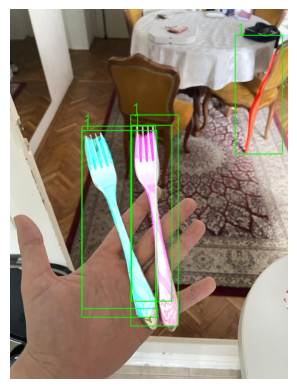

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt


folder = '/content/'
visual_folder = '/content/visualisator/'
imgname = 'viljuska.jpg'

image = cv2.imread(folder + imgname)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Move the model from GPU to CPU
model = model.to('cpu')
model.eval()

masks, boxes, pred_cls = get_prediction(
        image, model, threshold=0.75
)

# visualize result
visualize_prediction(
    image, masks, boxes, pred_cls, rect_th=3, text_size=3, text_th=3, file_name = imgname
)

image = cv2.imread(visual_folder + imgname)

# Load the image
image_path = visual_folder + imgname  # Replace with the path to your image file
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')  # Turn off axis ticks and labels
plt.show()

# Saving the model

In [ ]:
import zipfile
from google.colab import files
import datetime

# Get the current date and time
current_datetime = datetime.datetime.now()

# Create the string
file_name = "model_" + current_datetime.strftime("%Y-%m-%d_%H-%M-%S.pth")

torch.save(model.state_dict(), file_name)

# Specify the path to the model file
model_file_path = '/content/'+ file_name

# Specify the desired name for the compressed file
compressed_file_name = 'model.zip'

# Create a ZIP archive and add the model file to it
with zipfile.ZipFile(compressed_file_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write(model_file_path)

# Download the compressed file
files.download(compressed_file_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Download the compressed file
files.download(compressed_file_name)

# Making the test subset

In [5]:
from coco_dataset import coco_dataset_download as cocod
class_name='fork'
images_count=400
annotations_path='/content/annotations/instances_val2017.json'
cocod.coco_dataset_download(class_name,images_count,annotations_path)

loading annotations into memory...
Done (t=0.56s)
creating index...
index created!
no.of image: 1
no.of image: 2
no.of image: 3
no.of image: 4
no.of image: 5
no.of image: 6
no.of image: 7
no.of image: 8
no.of image: 9
no.of image: 10
no.of image: 11
no.of image: 12
no.of image: 13
no.of image: 14
no.of image: 15
no.of image: 16
no.of image: 17
no.of image: 18
no.of image: 19
no.of image: 20
no.of image: 21
no.of image: 22
no.of image: 23
no.of image: 24
no.of image: 25
no.of image: 26
no.of image: 27
no.of image: 28
no.of image: 29
no.of image: 30
no.of image: 31
no.of image: 32
no.of image: 33
no.of image: 34
no.of image: 35
no.of image: 36
no.of image: 37
no.of image: 38
no.of image: 39
no.of image: 40
no.of image: 41
no.of image: 42
no.of image: 43
no.of image: 44
no.of image: 45
no.of image: 46
no.of image: 47
no.of image: 48
no.of image: 49
no.of image: 50
no.of image: 51
no.of image: 52
no.of image: 53
no.of image: 54
no.of image: 55
no.of image: 56
no.of image: 57
no.of image: 5

In [16]:
import os
import random
import shutil

def distribute_images_randomly(image_folder, output_folder, num_folders):
    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Get the list of image files in the input folder
    image_files = os.listdir(image_folder)

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate the number of images per folder
    images_per_folder = len(image_files) // num_folders

    # Distribute the images into separate folders
    for i in range(num_folders):
        folder_path = os.path.join(output_folder, f'folder_{i+1}')
        os.makedirs(folder_path, exist_ok=True)

        # Select the images for the current folder
        start_index = i * images_per_folder
        end_index = (i + 1) * images_per_folder
        if i == num_folders - 1:
            end_index = len(image_files)  # For the last folder, include remaining images

        selected_images = image_files[start_index:end_index]

        # Copy the selected images to the current folder
        for image_file in selected_images:
            src_path = os.path.join(image_folder, image_file)
            dst_path = os.path.join(folder_path, image_file)
            shutil.copy(src_path, dst_path)

    print(f"Images distributed into {num_folders} folders at: {output_folder}")

# Set the necessary variables for creating the filtered annotation file
image_folder = '/content/fork'  # Replace with the path to the folder containing your fork images from the COCO dataset
picture_output_folder = '/content/forkTestPictures'

distribute_images_randomly(image_folder, picture_output_folder, 1)

Images distributed into 1 folders at: /content/forkTestPictures


In [17]:
import json
import os
import shutil

def create_fork_annotation_file(image_folder, annotation_file, picture_output_folder,anno_output_folder, class_name, image_count):
    # Create the output folder if it doesn't exist
    os.makedirs(picture_output_folder, exist_ok=True)
    os.makedirs(anno_output_folder, exist_ok=True)

    # Load the COCO annotation file
    with open(annotation_file, 'r') as f:
        coco_data = json.load(f)

    # Filter images that contain only the specified class
    filtered_images = [image for image in coco_data['images'] if image['file_name'] in os.listdir(image_folder)]
    filtered_image_ids = [image['id'] for image in filtered_images]

    #print(filtered_image_ids)

    # Filter annotations for the selected images

    filtered_annotations = [annotation for annotation in coco_data['annotations'] if annotation['image_id'] in filtered_image_ids and annotation['category_id'] == 48]
    for annotation in filtered_annotations:
        annotation['category_id'] = 1
    print("Filtrirana anotacija: ",filtered_annotations[0])

    # Update the image and annotation lists in the filtered COCO data
    coco_data['images'] = filtered_images
    coco_data['annotations'] = filtered_annotations

    # Remove all other categories
    coco_data['categories'] = [{"id": 1, "name": class_name}]

    # Save the filtered annotation file
    output_annotation_file = os.path.join(anno_output_folder, 'instances_fork.json')
    with open(output_annotation_file, 'w') as f:
        json.dump(coco_data, f)

    # Copy the selected fork images to the output folder
    for image in filtered_images:
        image_path = os.path.join(image_folder, image['file_name'])
        shutil.copy(image_path, picture_output_folder)

    print(f"Filtered annotation file saved at: {anno_output_folder}")
    print(f"Selected fork images copied to: {picture_output_folder}")


parent_folder = '/content/forkTestPictures'  # Replace with the path to the parent folder containing the subfolders

# Iterate over all subfolders
i = 1
for folder_name in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder_name)

    # Set the necessary variables for creating the filtered annotation file
    image_folder = folder_path
    annotation_file = '/content/annotations/instances_val2017.json'  # Replace with the path to the original COCO annotation file
    output_folder = '/content/valSubsets/'+ str(i)  # Replace with the desired output folder path
    picture_output_folder = os.path.join(output_folder, 'subsetPictures')
    anno_output_folder = os.path.join(output_folder, 'subsetAnnotations')
    i+=1

    # Create the filtered annotation file and copy the selected images to the output folder
    create_fork_annotation_file(image_folder, annotation_file, picture_output_folder, anno_output_folder, class_name, images_count)



Filtrirana anotacija:  {'segmentation': [[273.05, 403.94, 279.35, 395.65, 289.62, 387.54, 302.41, 377.81, 310.16, 373.85, 313.77, 372.23, 322.95, 371.86, 326.74, 372.23, 330.34, 373.13, 330.52, 376.73, 330.88, 380.69, 333.05, 384.66, 334.67, 385.02, 331.78, 390.42, 321.33, 397.45, 306.2, 405.92, 289.62, 415.29, 284.04, 417.81, 282.59, 416.37, 285.48, 413.13, 298.09, 405.02, 315.21, 395.11, 318.63, 392.77, 316.65, 392.05, 309.44, 395.47, 300.97, 401.05, 289.8, 408.08, 281.33, 413.31, 280.43, 411.32, 284.76, 407.0, 298.45, 397.81, 311.24, 390.6, 313.95, 388.62, 313.95, 386.64, 312.86, 386.1, 302.23, 393.13, 287.46, 402.5, 276.11, 410.24, 275.75, 407.72, 283.68, 399.97, 297.01, 391.32, 309.08, 383.22, 309.8, 382.14, 309.08, 381.59, 298.45, 387.72, 284.58, 396.91, 275.57, 403.76, 273.23, 404.84], [346.74, 369.7, 358.45, 362.5, 360.61, 370.78, 351.06, 374.57, 345.84, 376.19], [413.77, 330.96, 425.12, 324.66, 429.08, 322.86, 430.52, 323.22, 437.37, 333.13, 427.64, 338.53, 411.24, 345.38]], '

In [18]:
val_datasets=[]
good = 0
for i in range(1,2):
  dataset_root = '/content/valSubsets/'  # Replace with the path to your dataset root folder
  dataset_root += str(i)
  image_folder = dataset_root + '/subsetPictures'
  annotation_file = dataset_root + '/subsetAnnotations/instances_fork.json'
  try:
      val_dataset = COCODataset(image_folder, annotation_file)
      val_datasets.append(val_dataset)
      good += 1
  except:
    print("BAD DATASET ",i)

print("\nThere are " + str(good) + " usable subsets from 1")


There are 1 usable subsets from 1


# Evaluating the model

In [141]:
from torch.utils.data import DataLoader
from collections import defaultdict, deque
import time


device = torch.device("cuda:0")
model.to(device)
num_classes = 2
batch_size = 1
num_workers = 1
shuffle = True


test_sampler = torch.utils.data.SequentialSampler(val_datasets[0])

data_loader_test = torch.utils.data.DataLoader(
        val_datasets[0], batch_size=1,sampler=test_sampler, num_workers=num_workers, collate_fn=collate_fn
    )



coco_annotation_file = '/content/valSubsets/1/subsetAnnotations/instances_fork.json'

conf_mat = evaluate(model, data_loader_test, device=device)



creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Test:  [  0/155]  eta: 0:00:51  model_time: 0.1737 (0.1737)  evaluator_time: 0.0087 (0.0087)  time: 0.3336  data: 0.1463  max mem: 811
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.00s).
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.00s).
Running per image evaluation...


In [ ]:
from torch.utils.data import DataLoader

num_classes = 2  # Including background and forks



# Set the batch size and other training parameters
batch_size = 4
num_workers = 2
shuffle = True

test_data_loader = DataLoader(val_datasets[0], batch_size=batch_size, shuffle=shuffle, num_workers=num_workers, collate_fn=collate_fn)

In [ ]:
import torch
import time
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
from tqdm import tqdm


cpu_device = torch.device("cpu")
def evaluate_coco(model, data_loader, coco_annotation_file):
    # Load the COCO annotation file
    coco = COCO(coco_annotation_file)

    device = next(model.parameters()).device
    model.eval()

    results = []
    with torch.no_grad():
        for images, targets in tqdm(data_loader):
            images = list(img.to(device) for img in images)

            if device == "cuda":
               torch.cuda.synchronize()
            model_time = time.time()
            outputs = model(images)

            outputs = [{k: v.to(cpu_device) for k, v in t.items()} for t in outputs]
            model_time = time.time() - model_time

            res = {
                target["image_id"].item(): output
                for target, output in zip(targets, outputs)
            }
            coco_evaluator.update(res)


            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            outputs = model(images)

            for i in range(len(outputs)):
                boxes = outputs[i]['boxes'].cpu().numpy()
                scores = outputs[i]['scores'].cpu().numpy()
                labels = outputs[i]['labels'].cpu().numpy()

                image_id = coco.getImgIds(imgIds=i)[0]
                for j in range(len(boxes)):
                    result = {
                        'image_id': image_id,
                        'category_id': labels[j],
                        'bbox': boxes[j],
                        'score': scores[j]
                    }
                    results.append(result)

    # Load results into COCO evaluation tool
    coco_results = coco.loadRes(results)

    # Run COCO evaluation
    coco_evaluator = COCOeval(coco, coco_results, 'bbox')
    coco_evaluator.evaluate()
    coco_evaluator.accumulate()
    coco_evaluator.summarize()

# Example usage
coco_annotation_file = '/content/valSubsets/1/subsetAnnotations/instances_fork.json'

evaluate_coco(model, test_data_loader, coco_annotation_file)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


  0%|          | 0/39 [00:01<?, ?it/s]


UnboundLocalError: ignored

In [ ]:
import torch
from torchvision.ops import box_iou

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def compute_iou(box1, box2):
    device = box1.device  # Get the device of the first input tensor

    # Move the second input tensor to the same device
    box2 = box2.to(device)

    # Compute IoU between the two bounding boxes
    iou = box_iou(box1, box2)

    return iou

def calculate_metrics(model, data_loader, iou_threshold=0.5):
    model.eval()

    num_predictions = 0
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    ious = []

    with torch.no_grad():
        for images, targets in data_loader:
            images = list(image.to(device) for image in images)
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            outputs = model(images)
            predictions = [{k: v.to("cpu") for k, v in pred.items()} for pred in outputs]

            for i in range(len(predictions)):
                pred_box = predictions[i]['boxes']
                pred_label = predictions[i]['labels']
                pred_score = predictions[i]['scores']

                best_iou = 0.0
                best_target_idx = -1

                for j in range(len(targets)):
                    target_box = targets[j]['boxes']
                    target_label = targets[j]['labels']

                    iou = compute_iou(pred_box, target_box)
                    iou_values = iou.tolist()  # Convert the IoU tensor to a list



                if best_iou > iou_threshold and pred_label == targets[best_target_idx]['labels']:
                    true_positives += 1
                else:
                    false_positives += 1

            num_predictions += len(predictions)

    false_negatives = num_predictions - true_positives

    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * (precision * recall) / (precision + recall)

    return precision, recall, f1_score


# Example usage

precision, recall, f1_score = calculate_metrics(model, test_data_loader)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1_score:.4f}")


ZeroDivisionError: ignored